In [49]:
import pandas as pd
import os
import shutil

In [12]:
train = pd.read_csv('train.csv')

In [13]:
train.head()

,image,source,category,id
0,000001.jpg,user,"short sleeve top, trousers","1, 8"
1,000002.jpg,shop,"short sleeve top, short sleeve top","1, 1"
2,000003.jpg,user,long sleeve dress,11
3,000004.jpg,user,long sleeve dress,11
4,000005.jpg,user,long sleeve dress,11


In [15]:
train.describe()

,image,source,category,id
count,191961,191961,191961,191961
unique,191961,2,162,162
top,010441.jpg,shop,short sleeve dress,10
freq,1,132157,15588,15588


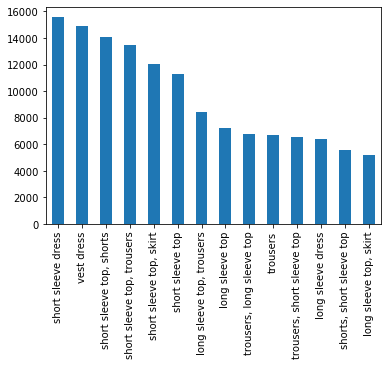

In [18]:
df5000 = train[train['category'].map(train['category'].value_counts()) > 5000]
df5000.category.value_counts().plot(kind="bar")

In [19]:
train.category.value_counts()[:15]

short sleeve dress            15588
vest dress                    14922
short sleeve top, shorts      14064
short sleeve top, trousers    13500
short sleeve top, skirt       12020
short sleeve top              11280
long sleeve top, trousers      8438
long sleeve top                7237
trousers, long sleeve top      6761
trousers                       6729
trousers, short sleeve top     6522
long sleeve dress              6429
shorts, short sleeve top       5537
long sleeve top, skirt         5225
vest, skirt                    3979
Name: category, dtype: int64

In [20]:
print(train.shape, df5000.shape)

(191961, 4) (134252, 4)


In [29]:
labels = df5000.category.unique()
print(labels)
print(df5000.source.value_counts())

['short sleeve top, trousers' 'long sleeve dress' 'long sleeve top'
 'long sleeve top, trousers' 'long sleeve top, skirt'
 'short sleeve top, skirt' 'shorts, short sleeve top'
 'short sleeve top, shorts' 'short sleeve top'
 'trousers, short sleeve top' 'trousers, long sleeve top' 'vest dress'
 'trousers' 'short sleeve dress']
shop    92129
user    42123
Name: source, dtype: int64


In [46]:
test = pd.read_csv('val.csv')
test = test[test['category'].isin(labels)]
print(test.category.value_counts())

short sleeve top, trousers    3535
short sleeve dress            2850
vest dress                    2760
short sleeve top, shorts      1899
short sleeve top              1817
short sleeve top, skirt       1790
long sleeve top, skirt        1580
long sleeve top, trousers     1353
long sleeve dress             1201
trousers, short sleeve top    1093
long sleeve top               1091
shorts, short sleeve top       667
trousers, long sleeve top      661
trousers                       649
Name: category, dtype: int64


In [45]:
train = df5000.groupby('category').head(5000)
print(train.category.value_counts(), train.source.value_counts())
print(train.head())
    

long sleeve top, trousers     5000
shorts, short sleeve top      5000
vest dress                    5000
short sleeve top, shorts      5000
trousers, long sleeve top     5000
long sleeve top, skirt        5000
long sleeve dress             5000
short sleeve dress            5000
long sleeve top               5000
trousers                      5000
short sleeve top, skirt       5000
trousers, short sleeve top    5000
short sleeve top, trousers    5000
short sleeve top              5000
Name: category, dtype: int64 shop    48921
user    21079
Name: source, dtype: int64
        image source                    category    id
0  000001.jpg   user  short sleeve top, trousers  1, 8
2  000003.jpg   user           long sleeve dress    11
3  000004.jpg   user           long sleeve dress    11
4  000005.jpg   user           long sleeve dress    11
5  000006.jpg   user           long sleeve dress    11


In [53]:
train_path = os.path.join('dataset', 'train', 'image')
test_path = os.path.join('dataset', 'validation', 'image')
new_train_path = os.path.join('dataset', 'new_train')
new_test_path = os.path.join('dataset', 'new_test')
train_images = list(df5000.image)
test_images = list(test.image)
if not os.path.exists(new_train_path) and not os.path.exists(new_test_path):
    os.mkdir(new_train_path)
    os.mkdir(new_test_path)

In [ ]:
for image in train_images:
    shutil.move(os.path.join(train_path, image), os.path.join(new_train_path, image))

In [ ]:
for image in test_images:
    shutil.move(os.path.join(test_path, image), os.path.join(new_test_path, image))